# Analisis Sederhana Formasi CASN 2024

## Import Library And Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_formasi = pd.read_csv('formasiCleaned.csv')
df_pendidikan = pd.read_csv('pendidikanCleaned.csv')

In [3]:
df_formasi = df_formasi.dropna(subset=['formasi_id'])

## Jumlah Formasi

### Jumlah Formasi Berdasarkan Instansi

Text(0.5, 1.0, 'Jumlah Formasi berdasarkan Instansi')

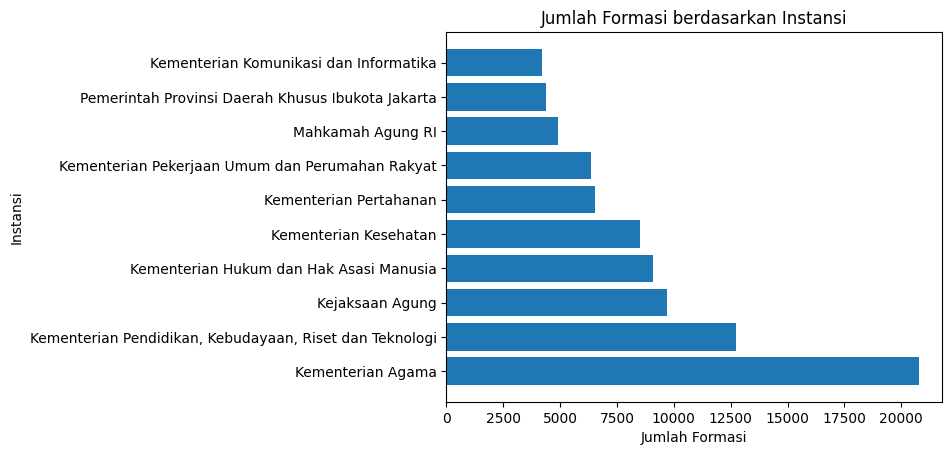

In [4]:
# Group by instansi All
sumFormasiByInstansi = df_formasi.groupby('ins_nm').sum()
sumFormasiByInstansi = sumFormasiByInstansi.sort_values(by='jumlah_formasi', ascending=False)
sumFormasiByInstansi.to_csv('output/sumFormasiByInstansi.csv')
# Just show top 10
sumFormasiByInstansi = sumFormasiByInstansi['jumlah_formasi'][:10]
sumFormasiByInstansi = sumFormasiByInstansi.reset_index()
sumFormasiByInstansi.columns = ['name', 'value']
sumFormasiByInstansi.to_json('output/web/sumByInstansi.json', orient='records')
# Plot top 10
plt.barh(sumFormasiByInstansi['name'], sumFormasiByInstansi['value'])
plt.xlabel('Jumlah Formasi')
plt.ylabel('Instansi')
plt.title('Jumlah Formasi berdasarkan Instansi')

### Jumlah Formasi Berdasarkan Jabatan

Text(0.5, 1.0, 'Jumlah Formasi berdasarkan Jabatan')

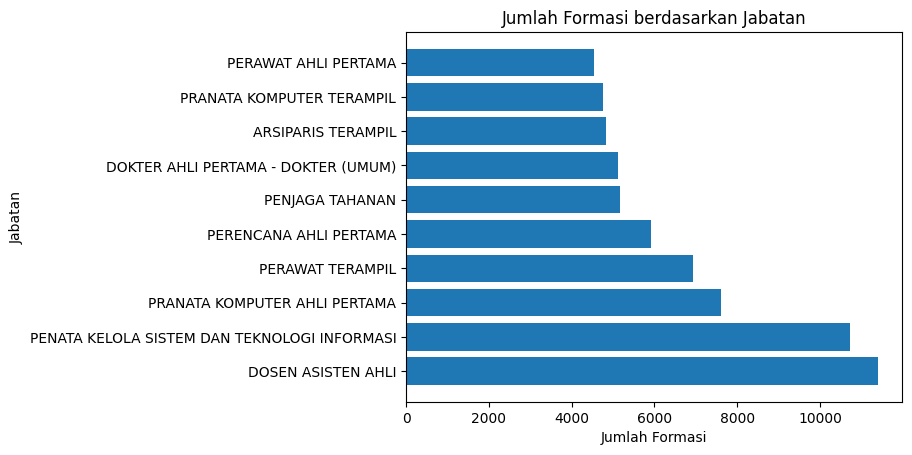

In [5]:
# Group by jabatan
sumFormasiByJabatan = df_formasi.groupby('jabatan_nm').sum()
sumFormasiByJabatan = sumFormasiByJabatan.sort_values(by='jumlah_formasi', ascending=False)
sumFormasiByJabatan.to_csv('output/sumFormasiByJabatan.csv')
# Just show top 10
sumFormasiByJabatan = sumFormasiByJabatan['jumlah_formasi'][:10]
sumFormasiByJabatan = sumFormasiByJabatan.reset_index()
sumFormasiByJabatan.columns = ['name', 'value']
sumFormasiByJabatan.to_json('output/web/sumByJabatan.json', orient='records')
# Plot top 10
plt.barh(sumFormasiByJabatan['name'], sumFormasiByJabatan['value'])
plt.xlabel('Jumlah Formasi')
plt.ylabel('Jabatan')
plt.title('Jumlah Formasi berdasarkan Jabatan')

### Jumlah Formasi Berdasarkan Pendidikan

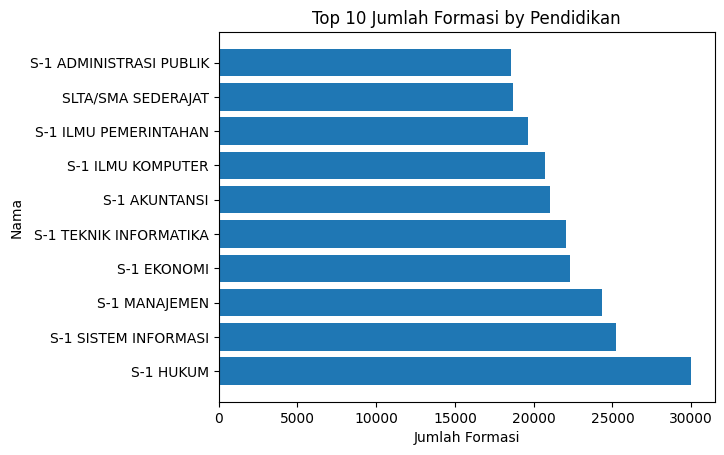

In [6]:
# Merge formasi and pendidikan, cepat_kode in kode_ref_pend
df_pendidikan_copy = df_pendidikan.copy()
df_formasi_copy = df_formasi.copy()
df_pendidikan_copy['cepat_kode'] = df_pendidikan_copy['cepat_kode'].astype(str)
df_formasi_copy['kode_ref_pend'] = df_formasi_copy['kode_ref_pend'].astype(str)
df_formasi_expanded = df_formasi_copy.assign(
    kode_ref_pend=df_formasi_copy['kode_ref_pend'].str.split(' / ')
).explode('kode_ref_pend')
filtered_formasi = df_formasi_expanded[
    df_formasi_expanded['kode_ref_pend'].isin(df_pendidikan_copy['cepat_kode'])
]
grouped_sum = filtered_formasi.groupby('kode_ref_pend')['jumlah_formasi'].sum().reset_index()
df_pendidikan_copy = df_pendidikan_copy.merge(
    grouped_sum, left_on='cepat_kode', right_on='kode_ref_pend', how='left'
)
df_pendidikan_copy['jumlah_formasi'].fillna(0, inplace=True)
df_pendidikan_copy = df_pendidikan_copy.sort_values(by='jumlah_formasi', ascending=False)
df_pendidikan_copy.to_csv('output/sumFormasiByPendidikan.csv', index=False)

# Just show top 10
sumFormasiByPendidikan = df_pendidikan_copy[['nama', 'jumlah_formasi']].head(10)
sumFormasiByPendidikan.columns = ['name', 'value']
sumFormasiByPendidikan.to_json('output/web/sumByPendidikan.json', orient='records')

# Plot top 10
plt.barh(sumFormasiByPendidikan['name'], sumFormasiByPendidikan['value'])
plt.xlabel('Jumlah Formasi')
plt.ylabel('Nama')
plt.title('Top 10 Jumlah Formasi by Pendidikan')
plt.show()

## Salary

### Salary Minimum dan Maximum Berdasarkan Instansi

#### Range Salary Berdasarkan Instansi - Diurutkan Berdasarkan Salary Tertinggi

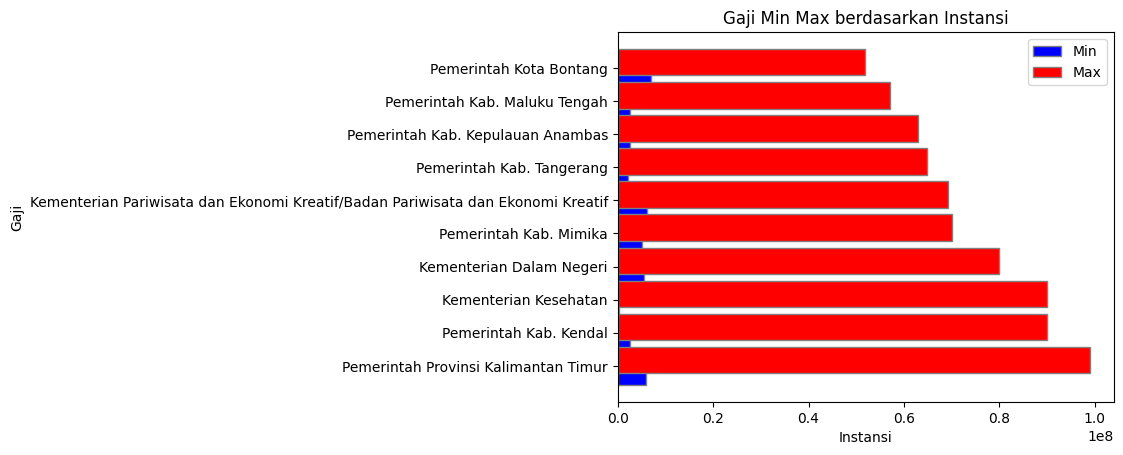

In [7]:
# group by instansi but find the min and max salary
salaryByInstansi = df_formasi.groupby('ins_nm').agg({'gaji_min':'min', 'gaji_max':'max'})
salaryByInstansi.to_csv('output/salaryMinMaxByInstansi.csv')
salaryByInstansiMax = salaryByInstansi.sort_values(by='gaji_max', ascending=False)
# just take the top 10
salaryByInstansiMax = salaryByInstansiMax[:10]
salaryByInstansiMax = salaryByInstansiMax.reset_index()
salaryByInstansiMax['name'] = salaryByInstansiMax['ins_nm']
salaryByInstansiMax['min'] = salaryByInstansiMax['gaji_min']
salaryByInstansiMax['max'] = salaryByInstansiMax['gaji_max']
salaryByInstansiMax = salaryByInstansiMax[{'name', 'min', 'max'}]
salaryByInstansiMax.to_json('output/web/salaryMinMaxByInstansiMax.json', orient='records')
# plot the graph
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(salaryByInstansiMax))
r2 = [x + barWidth for x in r1]
plt.barh(r1, salaryByInstansiMax['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, salaryByInstansiMax['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Instansi')
plt.ylabel('Gaji')
plt.title('Gaji Min Max berdasarkan Instansi')
plt.yticks([r + barWidth/2 for r in range(len(salaryByInstansiMax))], salaryByInstansiMax['name'])
plt.legend()
plt.show()

#### Gaji Minimum Tertinggi Berdasarkan Instansi

Text(0.5, 0, 'Juta')

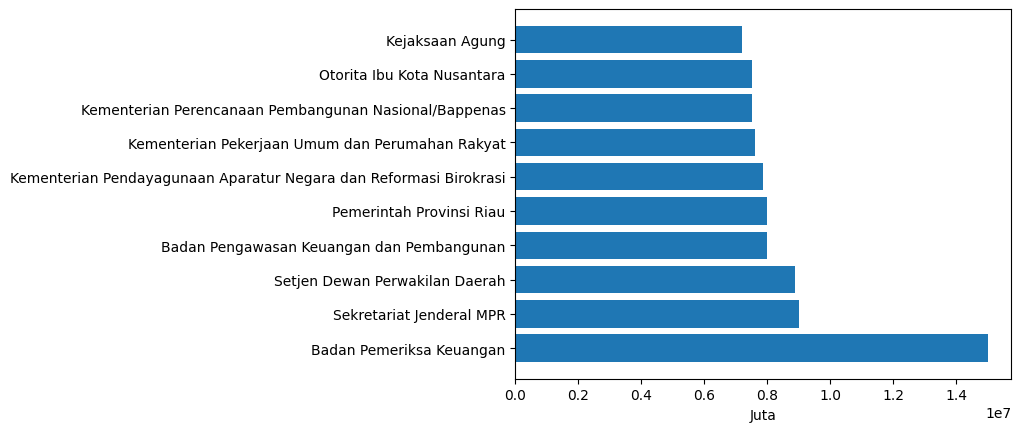

In [8]:
salaryByInstansiMin = df_formasi.groupby('ins_nm').agg({'gaji_min':'min', 'gaji_max':'max'})
salaryByInstansiMin = salaryByInstansiMin.sort_values(by='gaji_min', ascending=False)
salaryByInstansiMin = salaryByInstansiMin[:10]
salaryByInstansiMin = salaryByInstansiMin.reset_index()
salaryByInstansiMin['name'] = salaryByInstansiMin['ins_nm']
salaryByInstansiMin['value'] = salaryByInstansiMin['gaji_min']
salaryByInstansiMin = salaryByInstansiMin[{'name', 'value'}]
salaryByInstansiMin.to_json('output/web/salaryMinMaxByInstansiMin.json', orient='records')
plt.barh(salaryByInstansiMin['name'][:10], salaryByInstansiMin['value'])
plt.xlabel('Juta')

### Salary Minimun dan Maximum Berdasarkan Jabatan

#### Range Salary Berdasarkan Jabatan - Diurutkan Berdasarkan Salary Tertinggi

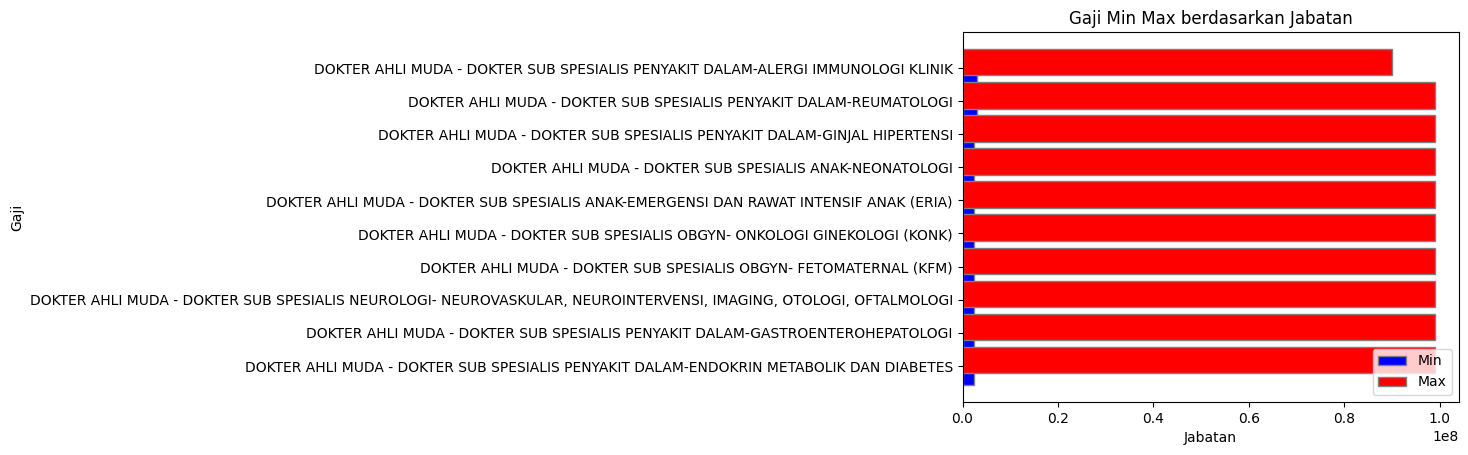

In [9]:
# group by jabatan and find the min and max salary
salaryByJabatan = df_formasi.groupby('jabatan_nm').agg({'gaji_min':'min', 'gaji_max':'max'})
salaryByJabatan.to_csv('output/salaryMinMaxByJabatan.csv')
salaryByJabatanMax = salaryByJabatan.sort_values(by='gaji_max', ascending=False)
# just take the top 10
salaryByJabatanMax = salaryByJabatanMax[:10]
salaryByJabatanMax = salaryByJabatanMax.reset_index()
salaryByJabatanMax['name'] = salaryByJabatanMax['jabatan_nm']
salaryByJabatanMax['min'] = salaryByJabatanMax['gaji_min']
salaryByJabatanMax['max'] = salaryByJabatanMax['gaji_max']
salaryByJabatanMax = salaryByJabatanMax[{'name', 'min', 'max'}]
salaryByJabatanMax.to_json('output/web/salaryMinMaxByJabatanMax.json', orient='records')
# Plot the graph
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(salaryByJabatanMax))
r2 = [x + barWidth for x in r1]
plt.barh(r1, salaryByJabatanMax['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, salaryByJabatanMax['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Jabatan')
plt.ylabel('Gaji')
plt.title('Gaji Min Max berdasarkan Jabatan')
plt.yticks([r + barWidth/2 for r in range(len(salaryByJabatanMax))], salaryByJabatanMax['name'])
plt.legend()

#### Gaji Minimum Tertinggi Berdasarkan Jabatan

Text(0.5, 0, 'Juta')

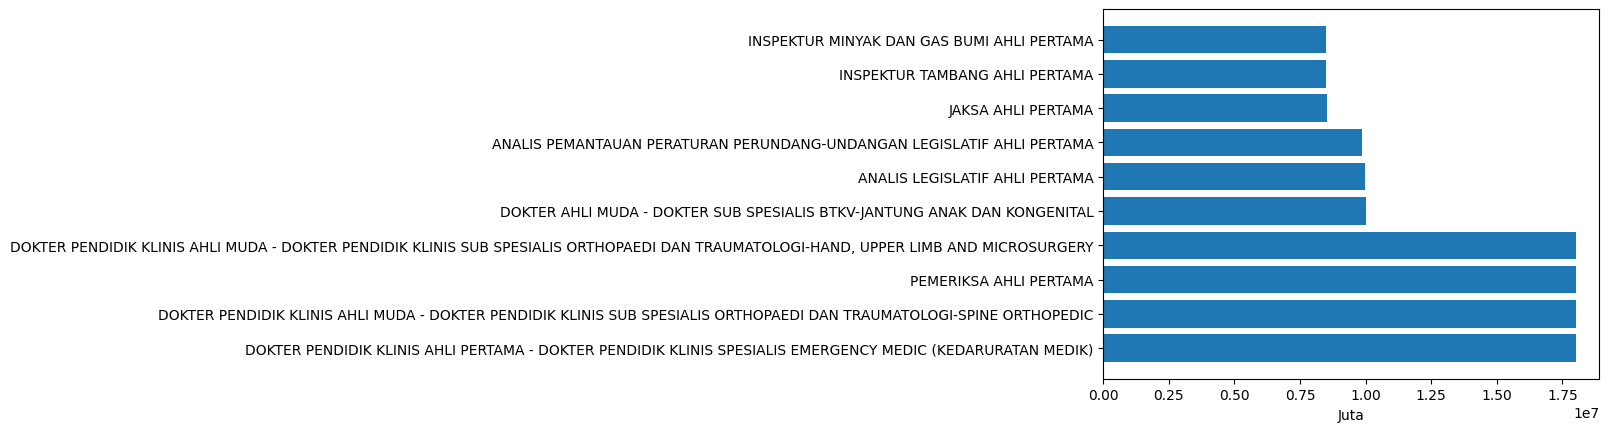

In [10]:
salaryByJabatanMin = salaryByJabatan.sort_values(by='gaji_min', ascending=False)
salaryByJabatanMin = salaryByJabatanMin[:10]
salaryByJabatanMin = salaryByJabatanMin.reset_index()
salaryByJabatanMin['name'] = salaryByJabatanMin['jabatan_nm']
salaryByJabatanMin['value'] = salaryByJabatanMin['gaji_min']

salaryByJabatanMin = salaryByJabatanMin[{'name', 'value'}]
salaryByJabatanMin.to_json('output/web/salaryMinMaxByJabatanMin.json', orient='records')
plt.barh(salaryByJabatanMin['name'][:10], salaryByJabatanMin['value'])
plt.xlabel('Juta')

### Salary Minimum dan Maximum Berdasarkan Pendidikan 

#### Range Salary Berdasarkan Pendidikan - Diurutkan Berdasarkan Salary Tertinggi

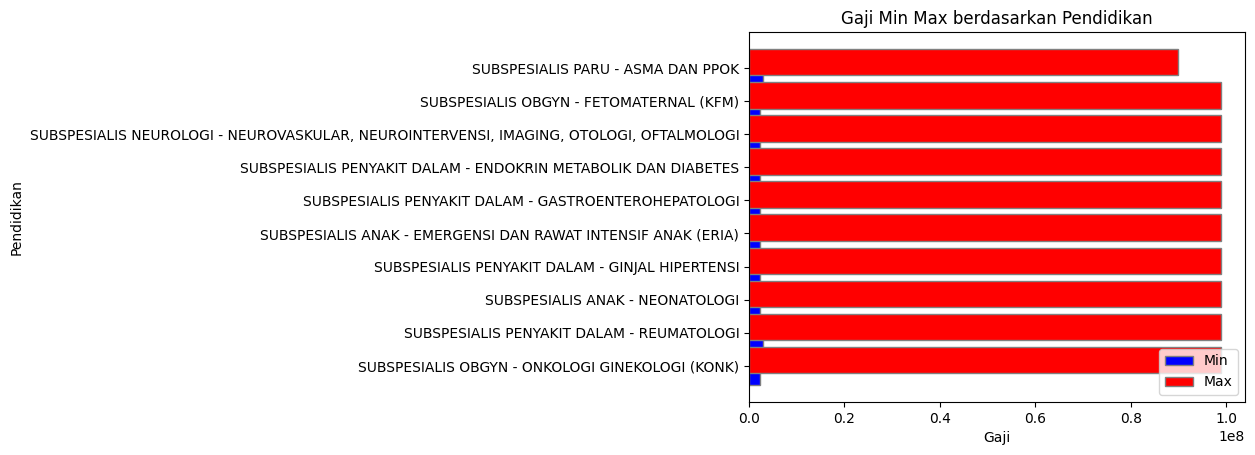

In [11]:
df_pendidikan_salary = df_pendidikan.copy()
df_formasi_salary = df_formasi.copy()
df_pendidikan_salary['cepat_kode'] = df_pendidikan_salary['cepat_kode'].astype(str)
df_formasi_salary['kode_ref_pend'] = df_formasi_salary['kode_ref_pend'].astype(str)
df_formasi_expanded = df_formasi_salary.assign(
    kode_ref_pend=df_formasi_salary['kode_ref_pend'].str.split(' / ')
).explode('kode_ref_pend')
filtered_formasi = df_formasi_expanded[
    df_formasi_expanded['kode_ref_pend'].isin(df_pendidikan_salary['cepat_kode'])
]
grouped_salary = filtered_formasi.groupby('kode_ref_pend').agg({
    'gaji_min': 'min',
    'gaji_max': 'max'
}).reset_index()
df_pendidikan_salary = df_pendidikan_salary.merge(
    grouped_salary, left_on='cepat_kode', right_on='kode_ref_pend', how='left'
)
df_pendidikan_salary['gaji_min'].fillna(0, inplace=True)
df_pendidikan_salary['gaji_max'].fillna(0, inplace=True)
df_pendidikan_salary = df_pendidikan_salary.sort_values(by='gaji_max', ascending=False)
df_pendidikan_salary.to_csv('output/salaryMinMaxByPendidikan.csv', index=False)
df_pendidikan_salary = df_pendidikan_salary.head(10)
df_pendidikan_salary = df_pendidikan_salary.reset_index(drop=True)
df_pendidikan_salary = df_pendidikan_salary[['nama', 'gaji_min', 'gaji_max']]
# rename columns
df_pendidikan_salary['name'] = df_pendidikan_salary['nama']
df_pendidikan_salary['min'] = df_pendidikan_salary['gaji_min']
df_pendidikan_salary['max'] = df_pendidikan_salary['gaji_max']
df_pendidikan_salary = df_pendidikan_salary[['name', 'min', 'max']]
df_pendidikan_salary.to_json('output/web/salaryMinMaxByPendidikanMax.json', orient='records')
# Plot
fig, ax = plt.subplots()
barWidth = 0.35
r1 = range(len(df_pendidikan_salary))
r2 = [x + barWidth for x in r1]
plt.barh(r1, df_pendidikan_salary['min'], color='b', edgecolor='grey', label='Min')
plt.barh(r2, df_pendidikan_salary['max'], color='r', edgecolor='grey', label='Max')
plt.xlabel('Gaji')
plt.ylabel('Pendidikan')
plt.title('Gaji Min Max berdasarkan Pendidikan')
plt.yticks([r + barWidth / 2 for r in range(len(df_pendidikan_salary))], df_pendidikan_salary['name'])
plt.legend()
plt.show()

#### Gaji Minimum Tertinggi Berdasarkan Pendidikan

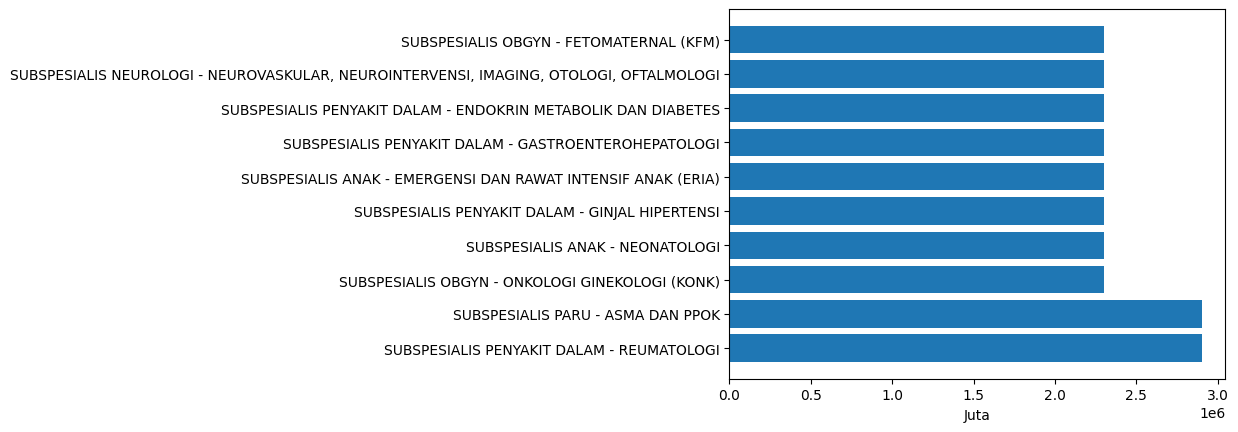

In [12]:
salaryByPendidikanMin = df_pendidikan_salary.sort_values(by='min', ascending=False)
salaryByPendidikanMin = salaryByPendidikanMin[:10]
salaryByPendidikanMin = salaryByPendidikanMin.reset_index()
salaryByPendidikanMin['name'] = salaryByPendidikanMin['name']
salaryByPendidikanMin['value'] = salaryByPendidikanMin['min']
salaryByPendidikanMin = salaryByPendidikanMin[{'name', 'value'}]
salaryByPendidikanMin.to_json('output/web/salaryMinMaxByPendidikanMin.json', orient='records')
plt.barh(salaryByPendidikanMin['name'][:10], salaryByPendidikanMin['value'])
plt.xlabel('Juta')
plt.show()